# Sports Stats

## Olympics Dataset - 120 years of data

SportsStats is a sports analysis firm partnering with local news and elite personal trainers to provide “interesting” insights to help their partners.  Insights could be patterns/trends highlighting certain groups/events/countries, etc. for the purpose of developing a news story or discovering key health insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
pdDF = pd.read_csv('athlete_events.csv',delimiter=',')
pdDF.head() 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [55]:
pdDF.shape

(271116, 15)

In [56]:
pdDF['Age'] = pd.to_numeric(pdDF['Age'],errors='coerce')
pdDF['Height'] = pd.to_numeric(pdDF['Height'],errors='coerce')
pdDF['Weight'] = pd.to_numeric(pdDF['Weight'],errors='coerce')
pdDF = pdDF[(pdDF['Year'] >= 1990) & (pdDF['Year'] < 2000)]
pdDF['Year'] = pd.to_datetime(pdDF['Year'],errors='coerce')

In [57]:
pdDF.shape

(36958, 15)

In [58]:
norm_mean = pdDF.groupby(['Event']).mean()
norm_mean = norm_mean[['Age','Height','Weight']]
n19 = norm_mean.rename(columns={'Age': 'Age19','Height': 'Height19','Weight': 'Weight19'})
n19

,Age19,Height19,Weight19
Event,,,
Alpine Skiing Men's Combined,24.025000,179.221374,82.778626
Alpine Skiing Men's Downhill,25.392157,179.942446,83.992806
Alpine Skiing Men's Giant Slalom,23.362205,177.880435,80.345109
Alpine Skiing Men's Slalom,23.834025,179.264368,81.094286
Alpine Skiing Men's Super G,23.711207,178.592179,80.966480
...,...,...,...
"Wrestling Men's Middleweight, Greco-Roman",25.461538,178.472222,83.444444
"Wrestling Men's Super-Heavyweight, Freestyle",27.484848,185.580645,121.741935
"Wrestling Men's Super-Heavyweight, Greco-Roman",27.885714,187.750000,124.064516


In [60]:
quart = pdDF.groupby(['Event'])[['Age','Height','Weight']].quantile(.25)
quart

,Age,Height,Weight
Event,,,
Alpine Skiing Men's Combined,22.00,177.00,78.0
Alpine Skiing Men's Downhill,23.00,177.00,78.0
Alpine Skiing Men's Giant Slalom,21.00,174.00,75.0
Alpine Skiing Men's Slalom,21.00,176.00,77.0
Alpine Skiing Men's Super G,21.00,176.00,76.0
...,...,...,...
"Wrestling Men's Middleweight, Greco-Roman",23.00,176.00,82.0
"Wrestling Men's Super-Heavyweight, Freestyle",24.00,182.50,120.0
"Wrestling Men's Super-Heavyweight, Greco-Roman",24.00,185.75,120.0


In [61]:
tert = pdDF.groupby(['Event'])[['Age','Height','Weight']].quantile(.75)
tert

,Age,Height,Weight
Event,,,
Alpine Skiing Men's Combined,26.0,182.00,88.0
Alpine Skiing Men's Downhill,27.0,182.50,90.0
Alpine Skiing Men's Giant Slalom,26.0,182.00,85.0
Alpine Skiing Men's Slalom,26.0,183.00,87.0
Alpine Skiing Men's Super G,26.0,182.00,86.5
...,...,...,...
"Wrestling Men's Middleweight, Greco-Roman",28.0,181.25,85.0
"Wrestling Men's Super-Heavyweight, Freestyle",29.0,190.00,130.0
"Wrestling Men's Super-Heavyweight, Greco-Roman",30.5,193.00,130.0


In [62]:
#This code creates the mean values for height,weight,age for medal winners
pdDFM = pdDF.loc[(pdDF['Medal'] == 'Gold') | (pdDF['Medal'] == 'Silver') | (pdDF['Medal'] == 'Bronze')]
medal_mean = pdDFM.groupby(['Event']).mean()
medal_mean = medal_mean[['Age','Height','Weight']]
Med19 = medal_mean.rename(columns={'Age': 'Age19M','Height': 'Height19M','Weight': 'Weight19M'})
Med19

,Age19M,Height19M,Weight19M
Event,,,
Alpine Skiing Men's Combined,23.888889,176.666667,83.111111
Alpine Skiing Men's Downhill,26.000000,181.555556,86.555556
Alpine Skiing Men's Giant Slalom,25.888889,177.666667,84.000000
Alpine Skiing Men's Slalom,26.000000,183.333333,89.000000
Alpine Skiing Men's Super G,24.666667,178.000000,84.555556
...,...,...,...
"Wrestling Men's Middleweight, Greco-Roman",25.500000,177.666667,82.833333
"Wrestling Men's Super-Heavyweight, Freestyle",27.833333,187.666667,121.333333
"Wrestling Men's Super-Heavyweight, Greco-Roman",28.500000,193.600000,115.600000


In [64]:
#This section allows me to compare the stats of the medal winners in the 1990s to all the competitors
merged = pd.merge(norm_mean, medal_mean, right_index=True, left_index=True)
merged['Age_diff_mean']=((merged['Age_y']-merged['Age_x'])/merged['Age_x'])*100
merged['Height_diff_mean']=((merged['Height_y']-merged['Height_x'])/merged['Height_x'])*100
merged['Weight_diff_mean']=((merged['Weight_y']-merged['Weight_x'])/merged['Weight_x'])*100
merged = merged[['Age_diff_mean','Height_diff_mean','Weight_diff_mean']]
merged

,Age_diff_mean,Height_diff_mean,Weight_diff_mean
Event,,,
Alpine Skiing Men's Combined,-0.566539,-1.425448,0.401656
Alpine Skiing Men's Downhill,2.393822,0.896459,3.051154
Alpine Skiing Men's Giant Slalom,10.815264,-0.120175,4.548990
Alpine Skiing Men's Slalom,9.087744,2.269813,9.748793
Alpine Skiing Men's Super G,4.029570,-0.331582,4.432791
...,...,...,...
"Wrestling Men's Middleweight, Greco-Roman",0.151057,-0.451362,-0.732357
"Wrestling Men's Super-Heavyweight, Freestyle",1.267916,1.124051,-0.335630
"Wrestling Men's Super-Heavyweight, Greco-Roman",2.202869,3.115846,-6.822673


In [65]:
qmerged = pd.merge(quart, medal_mean, right_index=True, left_index=True)
qmerged['Age_diff_quart']=((qmerged['Age_y']-qmerged['Age_x'])/qmerged['Age_x'])*100
qmerged['Height_diff_quart']=((qmerged['Height_y']-qmerged['Height_x'])/qmerged['Height_x'])*100
qmerged['Weight_diff_quart']=((qmerged['Weight_y']-qmerged['Weight_x'])/qmerged['Weight_x'])*100
qmerged = qmerged[['Age_diff_quart','Height_diff_quart','Weight_diff_quart']]
qmerged

,Age_diff_quart,Height_diff_quart,Weight_diff_quart
Event,,,
Alpine Skiing Men's Combined,8.585859,-0.188324,6.552707
Alpine Skiing Men's Downhill,13.043478,2.573760,10.968661
Alpine Skiing Men's Giant Slalom,23.280423,2.107280,12.000000
Alpine Skiing Men's Slalom,23.809524,4.166667,15.584416
Alpine Skiing Men's Super G,17.460317,1.136364,11.257310
...,...,...,...
"Wrestling Men's Middleweight, Greco-Roman",10.869565,0.946970,1.016260
"Wrestling Men's Super-Heavyweight, Freestyle",15.972222,2.831050,1.111111
"Wrestling Men's Super-Heavyweight, Greco-Roman",18.750000,4.226110,-3.666667


In [66]:
tmerged = pd.merge(tert, medal_mean, right_index=True, left_index=True)
tmerged['Age_diff_tert']=((tmerged['Age_y']-tmerged['Age_x'])/tmerged['Age_x'])*100
tmerged['Height_diff_tert']=((tmerged['Height_y']-tmerged['Height_x'])/tmerged['Height_x'])*100
tmerged['Weight_diff_tert']=((tmerged['Weight_y']-tmerged['Weight_x'])/tmerged['Weight_x'])*100
tmerged = tmerged[['Age_diff_tert','Height_diff_tert','Weight_diff_tert']]
tmerged

,Age_diff_tert,Height_diff_tert,Weight_diff_tert
Event,,,
Alpine Skiing Men's Combined,-8.119658,-2.930403,-5.555556
Alpine Skiing Men's Downhill,-3.703704,-0.517504,-3.827160
Alpine Skiing Men's Giant Slalom,-0.427350,-2.380952,-1.176471
Alpine Skiing Men's Slalom,0.000000,0.182149,2.298851
Alpine Skiing Men's Super G,-5.128205,-2.197802,-2.247913
...,...,...,...
"Wrestling Men's Middleweight, Greco-Roman",-8.928571,-1.977011,-2.549020
"Wrestling Men's Super-Heavyweight, Freestyle",-4.022989,-1.228070,-6.666667
"Wrestling Men's Super-Heavyweight, Greco-Roman",-6.557377,0.310881,-11.076923


In [67]:
#This section summarizes the difference across all events
diffmerge1 = pd.merge(merged, qmerged, right_index=True, left_index=True)
diffmerge = pd.merge(diffmerge1, tmerged, right_index=True, left_index=True).dropna()
diffmerge = diffmerge[['Age_diff_mean','Age_diff_quart','Age_diff_tert','Height_diff_mean','Height_diff_quart','Height_diff_tert','Weight_diff_mean','Weight_diff_quart','Weight_diff_tert']]
diffmerge

,Age_diff_mean,Age_diff_quart,Age_diff_tert,Height_diff_mean,Height_diff_quart,Height_diff_tert,Weight_diff_mean,Weight_diff_quart,Weight_diff_tert
Event,,,,,,,,,
Alpine Skiing Men's Combined,-0.566539,8.585859,-8.119658,-1.425448,-0.188324,-2.930403,0.401656,6.552707,-5.555556
Alpine Skiing Men's Downhill,2.393822,13.043478,-3.703704,0.896459,2.573760,-0.517504,3.051154,10.968661,-3.827160
Alpine Skiing Men's Giant Slalom,10.815264,23.280423,-0.427350,-0.120175,2.107280,-2.380952,4.548990,12.000000,-1.176471
Alpine Skiing Men's Slalom,9.087744,23.809524,0.000000,2.269813,4.166667,0.182149,9.748793,15.584416,2.298851
Alpine Skiing Men's Super G,4.029570,17.460317,-5.128205,-0.331582,1.136364,-2.197802,4.432791,11.257310,-2.247913
...,...,...,...,...,...,...,...,...,...
"Wrestling Men's Middleweight, Greco-Roman",0.151057,10.869565,-8.928571,-0.451362,0.946970,-1.977011,-0.732357,1.016260,-2.549020
"Wrestling Men's Super-Heavyweight, Freestyle",1.267916,15.972222,-4.022989,1.124051,2.831050,-1.228070,-0.335630,1.111111,-6.666667
"Wrestling Men's Super-Heavyweight, Greco-Roman",2.202869,18.750000,-6.557377,3.115846,4.226110,0.310881,-6.822673,-3.666667,-11.076923


In [68]:
#This section allows me to determine which events had medalists who were outliers relative to overall competition
ws = diffmerge.loc[(abs(diffmerge['Weight_diff_mean']) > abs(diffmerge['Weight_diff_quart'])) | (abs(diffmerge['Weight_diff_mean']) > abs(diffmerge['Weight_diff_tert']))]
hs = diffmerge.loc[(abs(diffmerge['Height_diff_mean']) > abs(diffmerge['Height_diff_quart'])) | (abs(diffmerge['Height_diff_mean']) > abs(diffmerge['Height_diff_tert']))]
ags = diffmerge.loc[(abs(diffmerge['Age_diff_mean']) > abs(diffmerge['Age_diff_quart'])) | (abs(diffmerge['Age_diff_mean']) > abs(diffmerge['Age_diff_tert']))]


In [69]:
filtab = pd.read_csv('athlete_events.csv',delimiter=',')
filtab.head() 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [70]:
filtab['Age'] = pd.to_numeric(filtab['Age'],errors='coerce')
filtab['Height'] = pd.to_numeric(filtab['Height'],errors='coerce')
filtab['Weight'] = pd.to_numeric(filtab['Weight'],errors='coerce')
filtab = filtab[(filtab['Year'] >= 2000) & (filtab['Year'] < 2010)]
filtab['Year'] = pd.to_datetime(filtab['Year'],errors='coerce')

In [71]:
Med20 = filtab.loc[(filtab['Medal'] == 'Gold') | (filtab['Medal'] == 'Silver') | (filtab['Medal'] == 'Bronze')]
Med20  = Med20.groupby(['Event']).mean()
Med20  = Med20[['Age','Height','Weight']]
Med20 = Med20.rename(columns={'Age': 'Age20M','Height': 'Height20M','Weight': 'Weight20M'})
Med20

,Age20M,Height20M,Weight20M
Event,,,
Alpine Skiing Men's Combined,25.333333,180.666667,86.833333
Alpine Skiing Men's Downhill,30.666667,184.666667,92.166667
Alpine Skiing Men's Giant Slalom,29.833333,181.166667,85.833333
Alpine Skiing Men's Slalom,26.333333,179.500000,84.166667
Alpine Skiing Men's Super G,30.666667,178.333333,88.000000
...,...,...,...
"Wrestling Men's Welterweight, Greco-Roman",25.400000,170.500000,67.100000
"Wrestling Women's Flyweight, Freestyle",24.000000,155.571429,48.000000
"Wrestling Women's Heavyweight, Freestyle",24.285714,171.285714,72.428571


In [72]:
filtab_mean = filtab.groupby(['Event'])[['Age','Height','Weight']].mean()
filtab_mean

,Age,Height,Weight
Event,,,
Alpine Skiing Men's Combined,24.396226,180.943396,85.943396
Alpine Skiing Men's Downhill,26.128440,180.944954,86.587156
Alpine Skiing Men's Giant Slalom,24.856250,178.930380,82.060510
Alpine Skiing Men's Slalom,24.611765,180.006061,82.096970
Alpine Skiing Men's Super G,25.652542,180.239316,85.256410
...,...,...,...
"Wrestling Men's Welterweight, Greco-Roman",26.661017,170.796610,67.542373
"Wrestling Women's Flyweight, Freestyle",24.483871,155.580645,48.387097
"Wrestling Women's Heavyweight, Freestyle",24.321429,170.035714,72.178571


In [73]:
w20  = pd.merge(filtab_mean, ws, right_index=True, left_index=True, how='inner')
w20 = w20[['Weight']]
w20 = w20.rename(columns={'Weight': 'Weight20'})
w20

,Weight20
Event,
Alpine Skiing Men's Giant Slalom,82.060510
Alpine Skiing Men's Slalom,82.096970
Alpine Skiing Men's Super G,85.256410
Alpine Skiing Women's Downhill,67.024691
Alpine Skiing Women's Slalom,64.488550
...,...
"Wrestling Men's Heavyweight, Freestyle",95.551724
"Wrestling Men's Light-Heavyweight, Greco-Roman",84.883333
"Wrestling Men's Lightweight, Freestyle",61.929825


In [74]:
h20  = pd.merge(filtab_mean, hs, right_index=True, left_index=True, how='inner')
h20 = h20[['Height']]
h20 = h20.rename(columns={'Height': 'Height20'})
h20

,Height20
Event,
Alpine Skiing Men's Combined,180.943396
Alpine Skiing Men's Downhill,180.944954
Alpine Skiing Men's Slalom,180.006061
Alpine Skiing Women's Downhill,168.320988
Alpine Skiing Women's Slalom,167.907692
...,...
"Wrestling Men's Featherweight, Greco-Roman",163.491803
"Wrestling Men's Light-Heavyweight, Freestyle",178.193548
"Wrestling Men's Lightweight, Freestyle",166.403509


In [75]:
a20  = pd.merge(filtab_mean, ags, right_index=True, left_index=True, how='inner')
a20 = a20[['Age']]
a20 = a20.rename(columns={'Age': 'Age20'})
a20

,Age20
Event,
Alpine Skiing Men's Giant Slalom,24.856250
Alpine Skiing Men's Slalom,24.611765
Alpine Skiing Women's Combined,22.189189
Alpine Skiing Women's Giant Slalom,23.138462
Alpine Skiing Women's Slalom,23.159091
...,...
"Wrestling Men's Heavyweight, Greco-Roman",27.161290
"Wrestling Men's Lightweight, Freestyle",26.070175
"Wrestling Men's Middleweight, Freestyle",26.370968


In [76]:
#Here I am combining the average weight,height, and age for all competitors and medalists in each event for the 1990s and 2000s filtered by events where outliers one in the 1990s
FW  = pd.merge(Med20, Med19, right_index=True, left_index=True, how='inner')
FW = pd.merge(FW, w20, right_index=True, left_index=True, how='inner')
FW = pd.merge(FW, n19, right_index=True, left_index=True, how='inner')
FW = FW[['Weight20M','Weight20','Weight19M','Weight19']]
FW

,Weight20M,Weight20,Weight19M,Weight19
Event,,,,
Alpine Skiing Men's Giant Slalom,85.833333,82.060510,84.000000,80.345109
Alpine Skiing Men's Slalom,84.166667,82.096970,89.000000,81.094286
Alpine Skiing Men's Super G,88.000000,85.256410,84.555556,80.966480
Alpine Skiing Women's Downhill,71.166667,67.024691,66.555556,64.560748
Alpine Skiing Women's Slalom,72.833333,64.488550,66.000000,63.791667
...,...,...,...,...
"Wrestling Men's Heavyweight, Freestyle",96.100000,95.551724,98.666667,100.235294
"Wrestling Men's Light-Heavyweight, Greco-Roman",84.111111,84.883333,89.000000,91.536585
"Wrestling Men's Lightweight, Freestyle",61.050000,61.929825,69.166667,70.500000


In [77]:
FH  = pd.merge(Med20, Med19, right_index=True, left_index=True, how='inner')
FH = pd.merge(FH, h20, right_index=True, left_index=True, how='inner')
FH = pd.merge(FH, n19, right_index=True, left_index=True, how='inner')
FH = FH[['Height20M','Height20','Height19M','Height19']]
FH

,Height20M,Height20,Height19M,Height19
Event,,,,
Alpine Skiing Men's Combined,180.666667,180.943396,176.666667,179.221374
Alpine Skiing Men's Downhill,184.666667,180.944954,181.555556,179.942446
Alpine Skiing Men's Slalom,179.500000,180.006061,183.333333,179.264368
Alpine Skiing Women's Downhill,168.666667,168.320988,170.666667,168.271028
Alpine Skiing Women's Slalom,171.500000,167.907692,171.000000,168.158621
...,...,...,...,...
"Wrestling Men's Featherweight, Greco-Roman",159.900000,163.491803,163.833333,166.764706
"Wrestling Men's Light-Heavyweight, Freestyle",178.100000,178.193548,178.333333,180.194444
"Wrestling Men's Lightweight, Freestyle",166.000000,166.403509,169.000000,171.421053


In [79]:
FA  = pd.merge(Med20, Med19, right_index=True, left_index=True, how='inner')
FA = pd.merge(FA, a20, right_index=True, left_index=True, how='inner')
FA = pd.merge(FA, n19, right_index=True, left_index=True, how='inner')
FA = FA[['Age20M','Age20','Age19M','Age19']]
FA

,Age20M,Age20,Age19M,Age19
Event,,,,
Alpine Skiing Men's Giant Slalom,29.833333,24.856250,25.888889,23.362205
Alpine Skiing Men's Slalom,26.333333,24.611765,26.000000,23.834025
Alpine Skiing Women's Combined,24.333333,22.189189,23.333333,21.563636
Alpine Skiing Women's Giant Slalom,24.000000,23.138462,24.111111,22.168605
Alpine Skiing Women's Slalom,22.666667,23.159091,23.666667,22.062857
...,...,...,...,...
"Wrestling Men's Heavyweight, Greco-Roman",25.600000,27.161290,27.166667,25.666667
"Wrestling Men's Lightweight, Freestyle",25.200000,26.070175,26.500000,25.175000
"Wrestling Men's Middleweight, Freestyle",26.700000,26.370968,24.333333,26.600000


In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
print("Weight RMSE 19M to 20 is {0}".format(np.sqrt(mean_squared_error(FW['Weight19M'], FW['Weight20']))))
print("Weight RMSE 19 to 20 is {0}".format(np.sqrt(mean_squared_error(FW['Weight19'], FW['Weight20']))))
print("Weight RMSE 19M to 20M is {0}".format(np.sqrt(mean_squared_error(FW['Weight19M'], FW['Weight20M']))))
print("Weight RMSE 19 to 20M is {0}".format(np.sqrt(mean_squared_error(FW['Weight19'], FW['Weight20M']))))
print("Weight RMSE 19 to 19M is {0}".format(np.sqrt(mean_squared_error(FW['Weight19'], FW['Weight19M']))))
print("Weight RMSE 20 to 20M is {0}".format(np.sqrt(mean_squared_error(FW['Weight20'], FW['Weight20M']))))
print("        ")
print("Height RMSE 19M to 20 is {0}".format(np.sqrt(mean_squared_error(FH['Height19M'], FH['Height20']))))
print("Height RMSE 19 to 20 is {0}".format(np.sqrt(mean_squared_error(FH['Height19'], FH['Height20']))))
print("Height RMSE 19M to 20M is {0}".format(np.sqrt(mean_squared_error(FH['Height19M'], FH['Height20M']))))
print("Height RMSE 19 to 20M is {0}".format(np.sqrt(mean_squared_error(FH['Height19'], FH['Height20M']))))
print("Height RMSE 19 to 19M is {0}".format(np.sqrt(mean_squared_error(FH['Height19'], FH['Height19M']))))
print("Height RMSE 20 to 20M is {0}".format(np.sqrt(mean_squared_error(FH['Height20'], FH['Height20M']))))
print("        ")
print("Age RMSE 19M to 20 is {0}".format(np.sqrt(mean_squared_error(FA['Age19M'], FA['Age20']))))
print("Age RMSE 19 to 20 is {0}".format(np.sqrt(mean_squared_error(FA['Age19'], FA['Age20']))))
print("Age RMSE 19M to 20M is {0}".format(np.sqrt(mean_squared_error(FA['Age19M'], FA['Age20M']))))
print("Age RMSE 19 to 20M is {0}".format(np.sqrt(mean_squared_error(FA['Age19'], FA['Age20M']))))
print("Age RMSE 20 to 20M is {0}".format(np.sqrt(mean_squared_error(FA['Age20'], FA['Age20M']))))
print("Age RMSE 19 to 19M is {0}".format(np.sqrt(mean_squared_error(FA['Age19'], FA['Age19M']))))
print("Age RMSE 20 to 20M is {0}".format(np.sqrt(mean_squared_error(FA['Age20'], FA['Age20M']))))

Weight RMSE 19M to 20 is 4.262015835749245
Weight RMSE 19 to 20 is 2.4286834055827504
Weight RMSE 19M to 20M is 4.10345631671713
Weight RMSE 19 to 20M is 4.410513880295541
Weight RMSE 19 to 19M is 4.3864190769395695
Weight RMSE 20 to 20M is 3.26679661425892
        
Height RMSE 19M to 20 is 3.811250331352683
Height RMSE 19 to 20 is 1.3227001203591533
Height RMSE 19M to 20M is 3.5808639989343845
Height RMSE 19 to 20M is 2.944769953454577
Height RMSE 19 to 19M is 3.8199136627326684
Height RMSE 20 to 20M is 2.6045078151771905
        
Age RMSE 19M to 20 is 2.5223001805125906
Age RMSE 19 to 20 is 1.2804440982611085
Age RMSE 19M to 20M is 2.7533332328985773
Age RMSE 19 to 20M is 2.696161686318647
Age RMSE 20 to 20M is 1.959418181916526
Age RMSE 19 to 19M is 2.605504464557112
Age RMSE 20 to 20M is 1.959418181916526


No handles with labels found to put in legend.


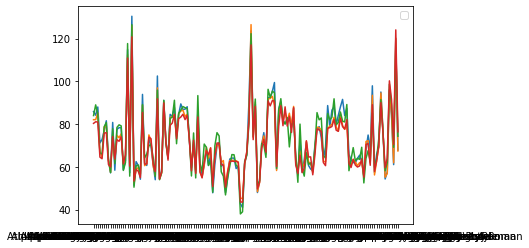

In [84]:
import matplotlib.pyplot as plt
plt.plot(FW)

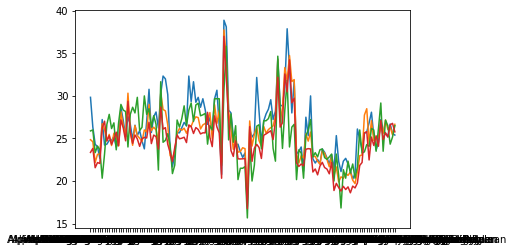

In [85]:
plt.plot(FA)

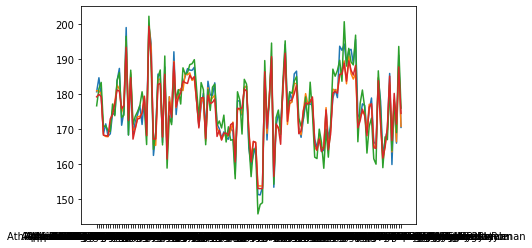

In [86]:
plt.plot(FH)